In [1]:
import random
import time
import datetime
import pandas as pd
import lightgbm as lgb
import numpy as np
import os
from Intelligent_well_control.src.models.utils.save_to_csv import SaveToCsv
from Intelligent_well_control.src.models.LGBM import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from Intelligent_well_control.src.models.utils.plt import PLT
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'~/data/压井/新数据/间接数据/一半总数据2.csv')

In [3]:
well_id_list  = data['well_id'].unique().tolist()

In [4]:
labels = 'overflow_detected'
rem_col_list = ['id', 'well_id', 'time', 'overflow_flag',
                'work_state', 'invader_type', 'kill_main_method_x',
                'deal_density', 'overflow_detected', 'block_id',
                'standpipe_pressure', 'casing_pressure']
feature_names1 = list(
                filter(lambda x: x not in rem_col_list, data.columns))



46 [21, 27, 28, 7, 8, 14, 17, 32, 33, 36, 37, 38, 40, 46, 49, 52, 54, 56, 57, 58, 60, 61, 62, 63, 2, 23, 70, 104, 74, 77, 78, 80, 84, 85, 86, 95, 97, 99, 101, 105, 107, 108, 110, 112, 75, 94]
[LightGBM] [Info] Number of positive: 445907, number of negative: 392093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.321419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15279
[LightGBM] [Info] Number of data points in the train set: 838000, number of used features: 340
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532109 -> initscore=0.128611
[LightGBM] [Info] Start training from score 0.128611
0.9923432533949725
13538 3449


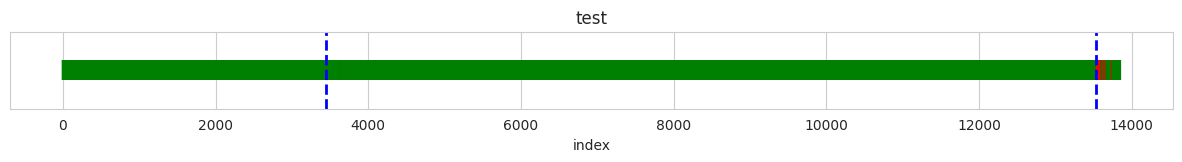

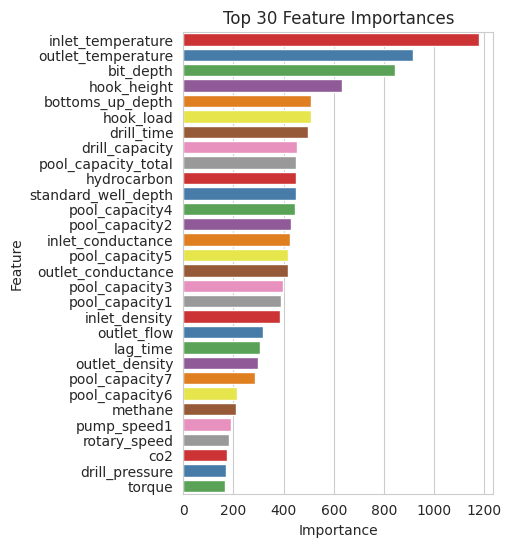

In [11]:
model1 = lgb.LGBMClassifier(n_estimators=500)
test_well_ids = [111]
rem_well = [111, 6, 4, 9, 5, 55, 71, 100, 19, 90, 65, 50, 13, 16, 11, 18]
# rem_well = [111]
train_well_ids = [i for i in well_id_list if i not in rem_well]
print(len(train_well_ids), train_well_ids)

X_train = data[data['well_id'].isin(train_well_ids)][feature_names1]
Y_train = data[data['well_id'].isin(train_well_ids)][labels]
X_test = data[data['well_id'].isin(test_well_ids)][feature_names1]
Y_test = data[data['well_id'].isin(test_well_ids)][labels]

model1.fit(X_train, Y_train)

Y_pred = model1.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc)
PLT().show2(Y_pred, Y_test)
PLT().show_feature_plot(30, model1)

60 [5, 6, 4, 9, 11, 16, 18, 19, 21, 27, 28, 7, 8, 13, 14, 17, 33, 36, 37, 38, 40, 46, 49, 50, 52, 54, 55, 56, 57, 58, 60, 61, 62, 65, 63, 2, 23, 70, 71, 104, 74, 77, 78, 80, 84, 85, 86, 90, 95, 97, 99, 100, 101, 105, 107, 108, 110, 112, 75, 94]
[LightGBM] [Info] Number of positive: 539986, number of negative: 477760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.348986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16237
[LightGBM] [Info] Number of data points in the train set: 1017746, number of used features: 349
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530570 -> initscore=0.122435
[LightGBM] [Info] Start training from score 0.122435
0.8564721178850043
13538 3449


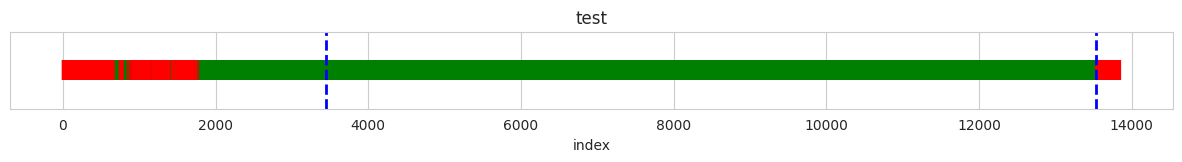

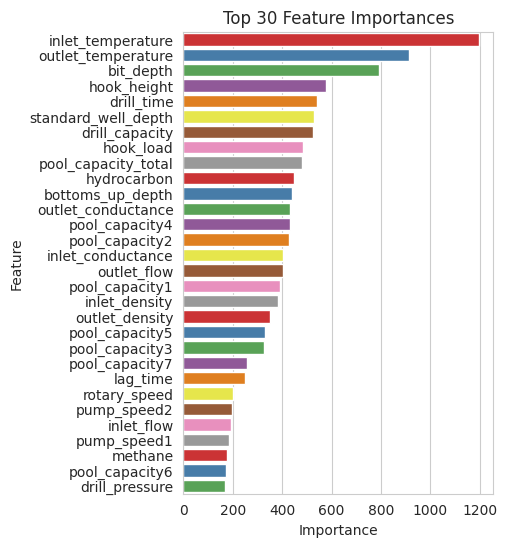

In [21]:
model2 = lgb.LGBMClassifier(n_estimators=500)
test_well_ids = [111]
rem_well = [111, 32]
# rem_well = [111, 32]
train_well_ids = [i for i in well_id_list if i not in rem_well]
print(len(train_well_ids), train_well_ids)

X_train = data[data['well_id'].isin(train_well_ids)][feature_names1]
Y_train = data[data['well_id'].isin(train_well_ids)][labels]
X_test = data[data['well_id'].isin(test_well_ids)][feature_names1]
Y_test = data[data['well_id'].isin(test_well_ids)][labels]

model2.fit(X_train, Y_train)

Y_pred = model2.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc)
PLT().show2(Y_pred, Y_test)
PLT().show_feature_plot(30, model2)

In [23]:
data111 = data[data['well_id'] == 111]

[LightGBM] [Info] Number of positive: 4999, number of negative: 1923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3833
[LightGBM] [Info] Number of data points in the train set: 6922, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.722190 -> initscore=0.955351
[LightGBM] [Info] Start training from score 0.955351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

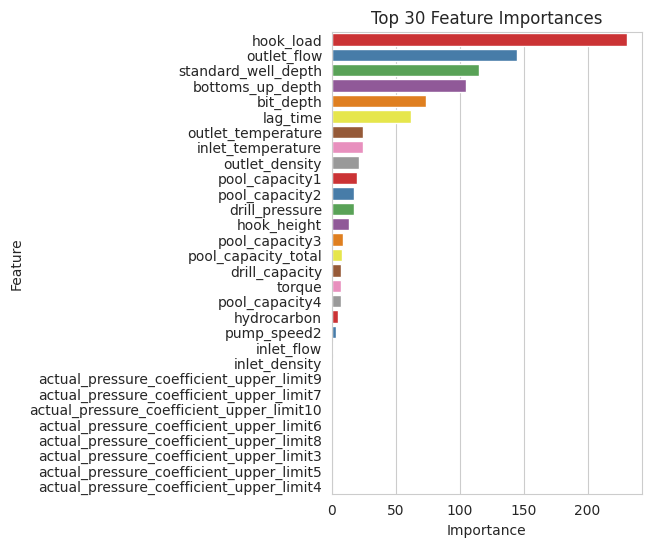

In [32]:


model3 = lgb.LGBMClassifier(n_estimators=500)
model3.fit(X_train, Y_train)

Y_pred = model3.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc, X_train.shape)
# PLT().show2(Y_pred, Y_test)
PLT().show_feature_plot(30, model3)

In [33]:
data11 = data[data['well_id'] == 11]

In [34]:
data11.shape

(3174, 384)

In [35]:
X_train = data[data['well_id'] == 11][feature_names1]
Y_train = data[data['well_id'] == 11][labels]
X_test = data[data['well_id'] == 111][feature_names1]
Y_test = data[data['well_id'] == 111][labels]

[LightGBM] [Info] Number of positive: 1556, number of negative: 1618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4006
[LightGBM] [Info] Number of data points in the train set: 3174, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490233 -> initscore=-0.039072
[LightGBM] [Info] Start training from score -0.039072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

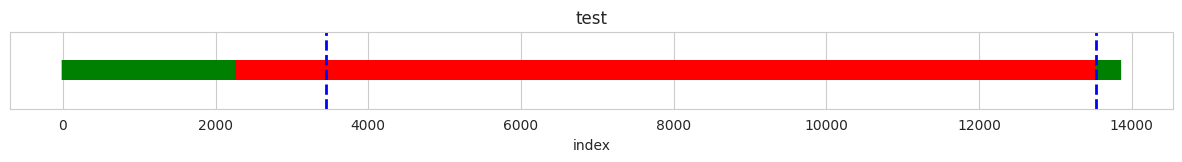

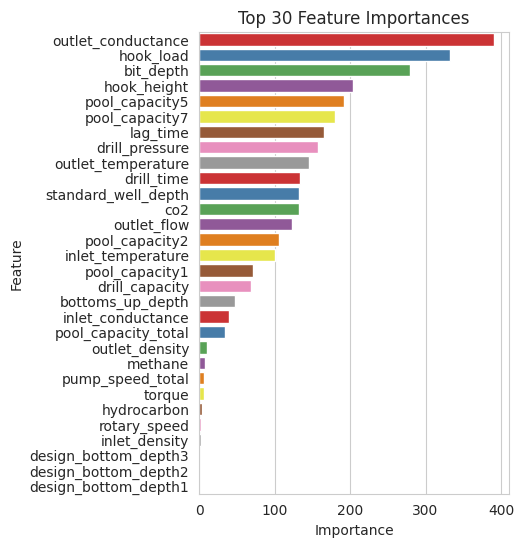

In [36]:
model4 = lgb.LGBMClassifier(n_estimators=500)
model4.fit(X_train, Y_train)

Y_pred = model4.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc, X_train.shape)
PLT().show2(Y_pred, Y_test)
PLT().show_feature_plot(30, model4)

In [53]:
X_train_111, X_test_111, Y_train_111, Y_test_111 = train_test_split(data111[feature_names1], data111[labels], test_size=0.99, random_state=2021)
X_train = data[data['well_id'] == 11][feature_names1]
Y_train = data[data['well_id'] == 11][labels]
X_test = data[data['well_id'] == 111][feature_names1]
Y_test = data[data['well_id'] == 111][labels]

print(X_train.shape, Y_train.shape)

X_train = pd.concat([X_train, X_train_111])
Y_train = pd.concat([Y_train, Y_train_111])

print(X_train.shape, Y_train.shape)

(3174, 373) (3174,)
(3312, 373) (3312,)


[LightGBM] [Info] Number of positive: 1650, number of negative: 1662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 3312, number of used features: 210
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498188 -> initscore=-0.007246
[LightGBM] [Info] Start training from score -0.007246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

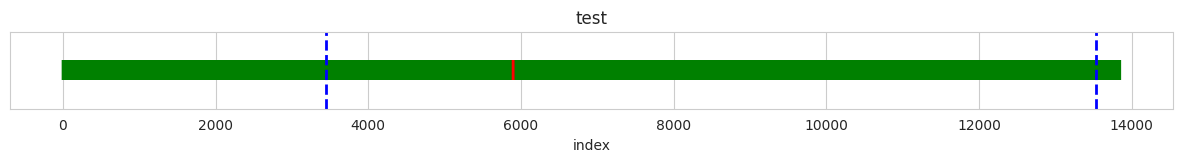

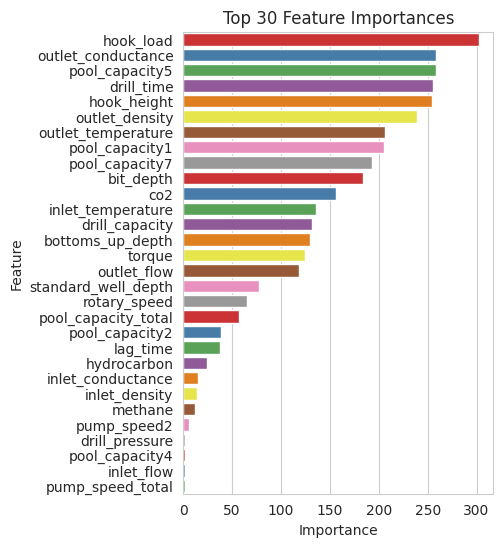

In [54]:
model5 = lgb.LGBMClassifier(n_estimators=500)
model5.fit(X_train, Y_train)

Y_pred = model5.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc, X_train.shape)
PLT().show2(Y_pred, Y_test)
PLT().show_feature_plot(30, model5)

只拿前面的5%训练，能准确预测后面的95吗？

In [60]:
train_n = data111.shape[0] * 30 // 100
X_train = data111[feature_names1][ : train_n]
Y_train = data111[labels][ : train_n]
X_test = data111[feature_names1][train_n : ]
Y_test = data111[labels][train_n : ]
print(X_train.shape, X_test.shape)

(4153, 373) (9691, 373)


[LightGBM] [Info] Number of positive: 704, number of negative: 3449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3589
[LightGBM] [Info] Number of data points in the train set: 4153, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169516 -> initscore=-1.589061
[LightGBM] [Info] Start training from score -1.589061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

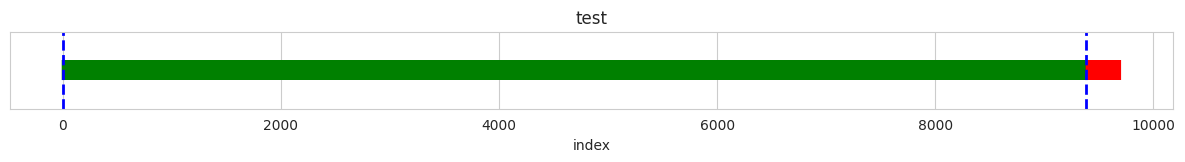

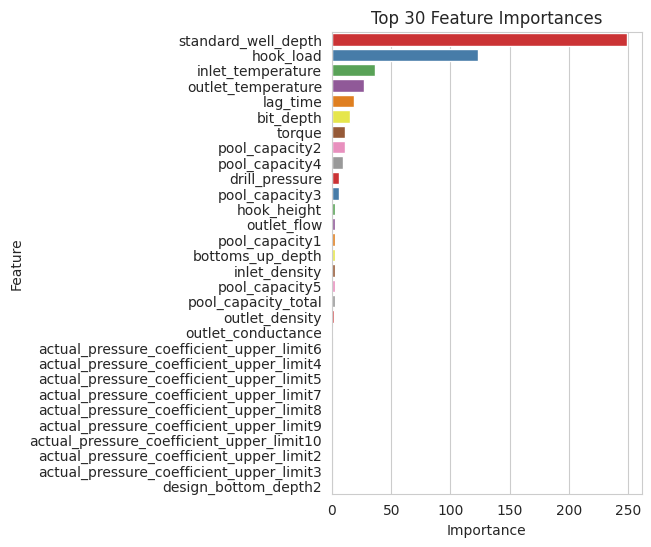

In [61]:
model6 = lgb.LGBMClassifier(n_estimators=500)
model6.fit(X_train, Y_train)

Y_pred = model6.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc, X_train.shape)
PLT().show2(Y_pred, Y_test)
PLT().show_feature_plot(30, model6)